In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
print("Vis setup Complete")
print("Setup complete.")

Vis setup Complete
Setup complete.


In [2]:
#Load the data using pandas read_csv function. This will generate a data frame we will use through the work.
X = pd.read_csv('goalkeepers_rating_saves_X.csv')
y = pd.read_csv('goalkeepers_rating_saves_y.csv')

In [3]:
#Show the first and last few records to check data is loading correctly
print(X.head())
print(y.tail())

   matches_played  aerials_l  aerials_w  assists  chances2score  clearances  \
0        0.054054   0.333333   0.066667      0.0            0.0    0.000000   
1        0.135135   0.000000   0.050000      0.0            0.0    0.075472   
2        0.054054   0.000000   0.100000      0.0            0.0    0.000000   
3        0.054054   0.000000   0.050000      0.0            0.0    0.056604   
4        0.000000   0.000000   0.066667      0.0            0.0    0.000000   

   countattack  crosses_acc  crosses_inacc  dangmistakes  ...  tballs_inacc  \
0     0.192308          0.0            0.0           0.0  ...         0.000   
1     0.250000          0.0            0.0           0.0  ...         0.000   
2     0.076923          0.0            0.0           0.0  ...         0.125   
3     0.000000          0.0            0.0           0.0  ...         0.000   
4     0.000000          0.0            0.0           0.0  ...         0.000   

    touches  wasfouled  ycards  degree_centrality 

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

X.dtypes

matches_played            float64
aerials_l                 float64
aerials_w                 float64
assists                   float64
chances2score             float64
clearances                float64
countattack               float64
crosses_acc               float64
crosses_inacc             float64
dangmistakes              float64
drib_success              float64
drib_unsuccess            float64
dribbled_past             float64
fouls                     float64
goals_ag_itb              float64
goals_ag_otb              float64
grduels_l                 float64
grduels_w                 float64
interceptions             float64
keypasses                 float64
lballs_acc                float64
lballs_inacc              float64
owngoals                  float64
passes_acc                float64
passes_inacc              float64
poss_lost                 float64
shots_offtarget           float64
shotsblocked              float64
stop_shots                float64
tackles       

In [5]:
import pandas as pd

# Assuming X_train_corr is your DataFrame
df = X

# Iterate through each column and check for columns with a single unique value
single_value_columns = [column for column in df.columns if df[column].nunique() == 1]

# Print columns with a single unique value
print("Columns with a single unique value:")
for column in single_value_columns:
    print(column)

Columns with a single unique value:


In [6]:
X.shape

(136, 41)

In [7]:
X.columns

Index(['matches_played', 'aerials_l', 'aerials_w', 'assists', 'chances2score',
       'clearances', 'countattack', 'crosses_acc', 'crosses_inacc',
       'dangmistakes', 'drib_success', 'drib_unsuccess', 'dribbled_past',
       'fouls', 'goals_ag_itb', 'goals_ag_otb', 'grduels_l', 'grduels_w',
       'interceptions', 'keypasses', 'lballs_acc', 'lballs_inacc', 'owngoals',
       'passes_acc', 'passes_inacc', 'poss_lost', 'shots_offtarget',
       'shotsblocked', 'stop_shots', 'tackles', 'tballs_acc', 'tballs_inacc',
       'touches', 'wasfouled', 'ycards', 'degree_centrality',
       'betweenness_centrality', 'closeness_centrality', 'flow_centrality',
       'betweenness2goals', 'game_duration'],
      dtype='object')

In football (soccer), player positions are grouped into four main categories: Goalkeepers, Defenders, Midfielders, and Forwards. Each of the columns you mentioned in your dataset corresponds to a specific position within these categories. Here’s a detailed breakdown:

Goalkeepers (GK)
GK (Goalkeeper): The primary role is to prevent the opposing team from scoring by guarding the goal. Goalkeepers are the only players allowed to use their hands, but only within the penalty area.
Defenders
LB (Left Back): A defender positioned on the left side, responsible for preventing opposition attacks down the right wing.
LCB (Left Center Back): A central defender on the left side of the defense.
CB (Center Back): Central defenders who protect the area directly in front of the goal.
RCB (Right Center Back): A central defender on the right side of the defense.
RB (Right Back): A defender positioned on the right side, responsible for preventing opposition attacks down the left wing.
LWB (Left Wing Back): Similar to a left back but with more offensive duties, often seen in formations with three central defenders.
RWB (Right Wing Back): Similar to a right back but with more offensive duties, often seen in formations with three central defenders.
Midfielders
CDM (Center Defensive Midfielder): Positioned in front of the defenders, focusing on intercepting the ball and breaking up opposition plays.
LDM (Left Defensive Midfielder): A defensive midfielder on the left side.
RDM (Right Defensive Midfielder): A defensive midfielder on the right side.
CM (Center Midfielder): Plays centrally, linking defense and attack, often covering both defensive and offensive roles.
LCM (Left Center Midfielder): A central midfielder leaning towards the left.
RCM (Right Center Midfielder): A central midfielder leaning towards the right.
CAM (Center Attacking Midfielder): Positioned behind the forwards, focusing on creating scoring opportunities.
LAM (Left Attacking Midfielder): An attacking midfielder on the left side.
RAM (Right Attacking Midfielder): An attacking midfielder on the right side.
LM (Left Midfielder): Positioned on the left side of the midfield, balancing defense and attack.
RM (Right Midfielder): Positioned on the right side of the midfield, balancing defense and attack.
Forwards
ST (Striker): The primary goal-scorer, positioned closest to the opponent's goal.
LS (Left Striker): A forward on the left side of the attack.
RS (Right Striker): A forward on the right side of the attack.
CF (Center Forward): Similar to a striker but may play slightly deeper, involved in both scoring and assisting.
LF (Left Forward): Positioned on the left side, slightly behind the main striker.
RF (Right Forward): Positioned on the right side, slightly behind the main striker.
LW (Left Winger): Positioned on the left wing, focused on delivering crosses and creating scoring opportunities from wide positions.
RW (Right Winger): Positioned on the right wing, focused on delivering crosses and creating scoring opportunities from wide positions.
These groupings ensure a balanced distribution of responsibilities on the field, with each position playing a crucial role in the team's overall strategy​ (Football Guide)​​ (Jobs In Football)​​ (Soccermodo)​.

https://www.football-guide.com/soccer-info/soccer-positions-explained.html

https://jobsinfootball.com/blog/soccer-positions/

https://soccermodo.com/soccer-positions/






In [8]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd


# Perform feature selection using SelectKBest with f_regression
selector = SelectKBest(score_func=f_regression, k='all')  # Select all features
selector.fit(X, y)

# Get the scores of each feature
scores = selector.scores_

# Create a DataFrame for better visualization
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})

# Sort the features by score in descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False).reset_index(drop=True)

# Display the ranked features
print(feature_scores)

                   Feature        Score
0                  touches  1404.564183
1                poss_lost  1306.984541
2             passes_inacc  1221.145579
3             lballs_inacc  1189.428582
4               lballs_acc  1121.120032
5             goals_ag_itb   992.692469
6           matches_played   836.748750
7               passes_acc   756.727389
8            interceptions   391.756984
9                aerials_w   306.365230
10              clearances   193.380452
11            goals_ag_otb   192.175098
12               wasfouled   124.809312
13             countattack   122.996381
14                   fouls    67.707418
15                  ycards    62.848360
16               grduels_w    60.070916
17               grduels_l    56.527040
18            tballs_inacc    53.767429
19           dribbled_past    52.033962
20              tballs_acc    36.925521
21            dangmistakes    33.400760
22               aerials_l    31.976838
23         shots_offtarget    21.912751


C:\Users\chibu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_regression


# Perform feature selection using SelectKBest with mutual_info_regression
selector = SelectKBest(score_func=mutual_info_regression, k='all')  # Select all features
selector.fit(X, y)

# Get the scores of each feature
scores = selector.scores_

# Create a DataFrame for better visualization
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})

# Sort the features by score in descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False).reset_index(drop=True)

# Display the ranked features
print(feature_scores)

                   Feature     Score
0                  touches  1.196457
1           matches_played  1.031233
2                poss_lost  1.009595
3               lballs_acc  1.001986
4             passes_inacc  0.952234
5               passes_acc  0.916551
6             goals_ag_itb  0.903518
7             lballs_inacc  0.883124
8            interceptions  0.664025
9                aerials_w  0.477818
10            goals_ag_otb  0.453905
11              clearances  0.417599
12             countattack  0.386009
13            tballs_inacc  0.310256
14                   fouls  0.267114
15               wasfouled  0.254232
16  betweenness_centrality  0.243960
17               aerials_l  0.176906
18                  ycards  0.159102
19               grduels_l  0.153062
20               grduels_w  0.150685
21            dangmistakes  0.148388
22           dribbled_past  0.132615
23                 tackles  0.119991
24         flow_centrality  0.106058
25    closeness_centrality  0.095547
2

C:\Users\chibu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\chibu\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


                   Feature  Importance
0           matches_played    0.181642
1             lballs_inacc    0.154108
2                  touches    0.128996
3             passes_inacc    0.125587
4                poss_lost    0.124674
5               lballs_acc    0.105132
6               passes_acc    0.064404
7             goals_ag_itb    0.057095
8            interceptions    0.010775
9   betweenness_centrality    0.003833
10             countattack    0.003315
11                   fouls    0.002944
12    closeness_centrality    0.002706
13               grduels_w    0.002647
14                 tackles    0.002538
15       degree_centrality    0.002477
16           dribbled_past    0.002361
17       betweenness2goals    0.002326
18               wasfouled    0.002171
19         flow_centrality    0.001804
20            tballs_inacc    0.001698
21              clearances    0.001668
22               aerials_w    0.001647
23            goals_ag_otb    0.001597
24            dangmistake

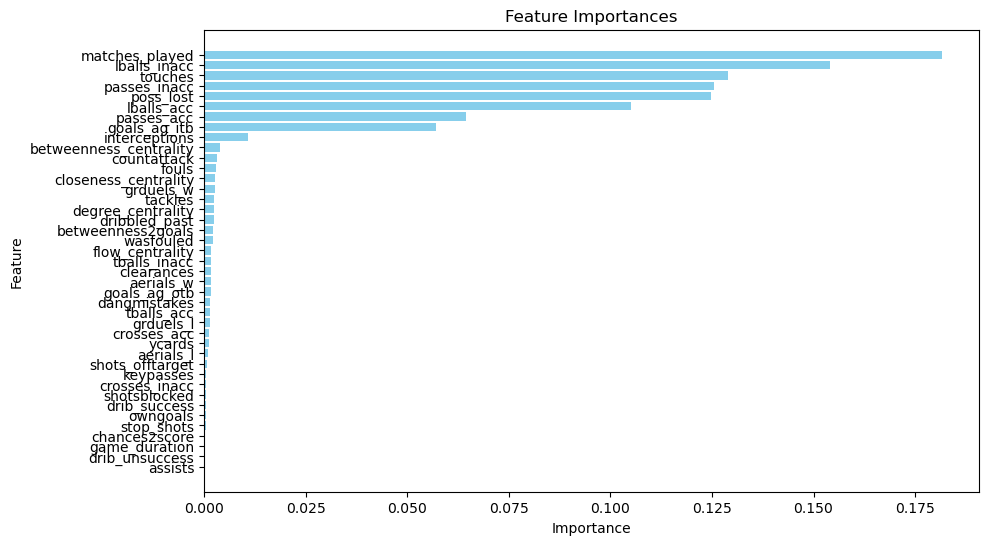

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

# Fit an ExtraTreesRegressor model
model = ExtraTreesRegressor(random_state=42)
model.fit(X, y)

# Get the feature importances
importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display the ranked features
print(feature_importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [11]:
import pandas as pd

# Combine X and y into a single DataFrame
data = pd.concat([X, y], axis=1)

# Calculate the correlation matrix
data.corr()

,matches_played,aerials_l,aerials_w,assists,chances2score,clearances,countattack,crosses_acc,crosses_inacc,dangmistakes,drib_success,drib_unsuccess,dribbled_past,fouls,goals_ag_itb,goals_ag_otb,grduels_l,grduels_w,interceptions,keypasses,lballs_acc,lballs_inacc,owngoals,passes_acc,passes_inacc,poss_lost,shots_offtarget,shotsblocked,stop_shots,tackles,tballs_acc,tballs_inacc,touches,wasfouled,ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,game_duration,total_saves
matches_played,1.000000,0.483947,0.848352,0.160803,0.242936,0.784073,0.730990,0.315974,0.243341,0.475666,0.181805,0.254056,0.524153,0.535055,0.912206,0.748095,0.565634,0.583489,0.900784,0.317142,0.887503,0.923919,0.230716,0.882870,0.926042,0.933697,0.259544,0.129993,-0.046436,0.361411,0.476757,0.500727,0.919767,0.668414,0.531412,0.178348,0.232451,0.160696,0.072630,0.153622,-0.160231,0.928419
aerials_l,0.483947,1.000000,0.441373,0.158695,-0.018001,0.481726,0.416974,0.171174,0.129772,0.374637,0.097743,0.048178,0.217402,0.445637,0.423589,0.299763,0.381761,0.433059,0.471000,0.181074,0.411867,0.506587,0.079045,0.454895,0.504392,0.513780,-0.003756,-0.039742,-0.042797,0.414195,0.177846,0.524415,0.469912,0.464609,0.436133,0.136681,0.156769,0.112219,0.078670,0.147635,-0.138097,0.438929
aerials_w,0.848352,0.441373,1.000000,0.144299,0.208496,0.742136,0.707789,0.293959,0.268703,0.394074,0.123561,0.277039,0.401481,0.481398,0.805526,0.678440,0.474747,0.607046,0.804128,0.378691,0.807202,0.818750,0.174417,0.794744,0.817871,0.830327,0.247317,0.184138,0.008165,0.440541,0.441650,0.487556,0.833078,0.720488,0.464238,0.206075,0.280876,0.139758,0.108687,0.118949,-0.101719,0.834091
assists,0.160803,0.158695,0.144299,1.000000,-0.020063,0.081155,-0.002547,-0.025212,-0.018297,0.304655,0.169410,-0.018348,0.207137,0.031428,0.177082,0.055147,0.123222,0.223570,0.129110,0.142219,0.152353,0.191049,0.179139,0.100750,0.190508,0.183549,-0.021267,-0.010515,-0.019647,0.087374,0.448511,0.085347,0.110037,0.105419,0.000445,0.008946,0.090196,0.036341,-0.028777,0.256142,-0.036537,0.094320
chances2score,0.242936,-0.018001,0.208496,-0.020063,1.000000,0.111753,0.027616,0.150475,-0.024595,0.050199,0.280663,0.422578,0.112189,0.256909,0.305040,0.518717,0.176113,0.096932,0.282891,-0.034910,0.400635,0.244427,0.129788,0.359309,0.255567,0.244099,0.943381,0.370309,-0.026410,0.046458,-0.057014,0.047097,0.340592,0.237615,0.212344,0.084540,0.103944,0.024927,0.111766,0.068524,-0.049113,0.350862
clearances,0.784073,0.481726,0.742136,0.081155,0.111753,1.000000,0.712972,0.210728,0.137839,0.523554,0.187072,0.193145,0.431820,0.467356,0.773180,0.573707,0.511657,0.631607,0.858405,0.254498,0.751172,0.775212,0.212071,0.834370,0.780199,0.807425,0.143870,0.119989,-0.061629,0.424552,0.407940,0.459062,0.840437,0.585078,0.464514,0.297048,0.310895,0.265972,0.213833,0.127858,-0.136229,0.768564
countattack,0.730990,0.416974,0.707789,-0.002547,0.027616,0.712972,1.000000,0.093864,0.046788,0.438662,0.205880,0.252353,0.385513,0.488918,0.660064,0.476410,0.465702,0.489358,0.732627,0.128543,0.593745,0.676471,0.123343,0.734878,0.683519,0.704341,0.053951,0.185282,-0.003353,0.300286,0.213359,0.409871,0.746188,0.546083,0.484253,0.223760,0.159652,0.196260,0.143981,0.126364,-0.105927,0.691803
crosses_acc,0.315974,0.171174,0.293959,-0.025212,0.150475,0.210728,0.093864,1.000000,0.691778,0.011772,0.186379,0.109514,0.175804,0.277890,0.307947,0.330537,0.293733,0.153792,0.324012,0.581173,0.371969,0.325545,0.093347,0.250161,0.319648,0.317966,0.086219,-0.017762,-0.033188,0.043513,0.080388,0.136076,0.271205,0.245873,0.263434,0.018149,0.073833,0.033408,-0.044325,0.012043,-0.061719,0.315260
crosses_inacc,0.243341,0.129772,0.268703,-0.018297,-0.024595,0.137839,0.046788,0.691778,1.000000,-0.010664,-0.033725,0.084841,0.178561,0.229444,0.181620,0.160775,0.226489,0.061525,0.262478,0.716919,0.280843,0.283690,-0.033499,0.137294,0.269169,0.269354,-0.026071,-0.012890,-0.024085,0.149703,0.138051,0.134765,0.170552,0.0860

<Axes: >

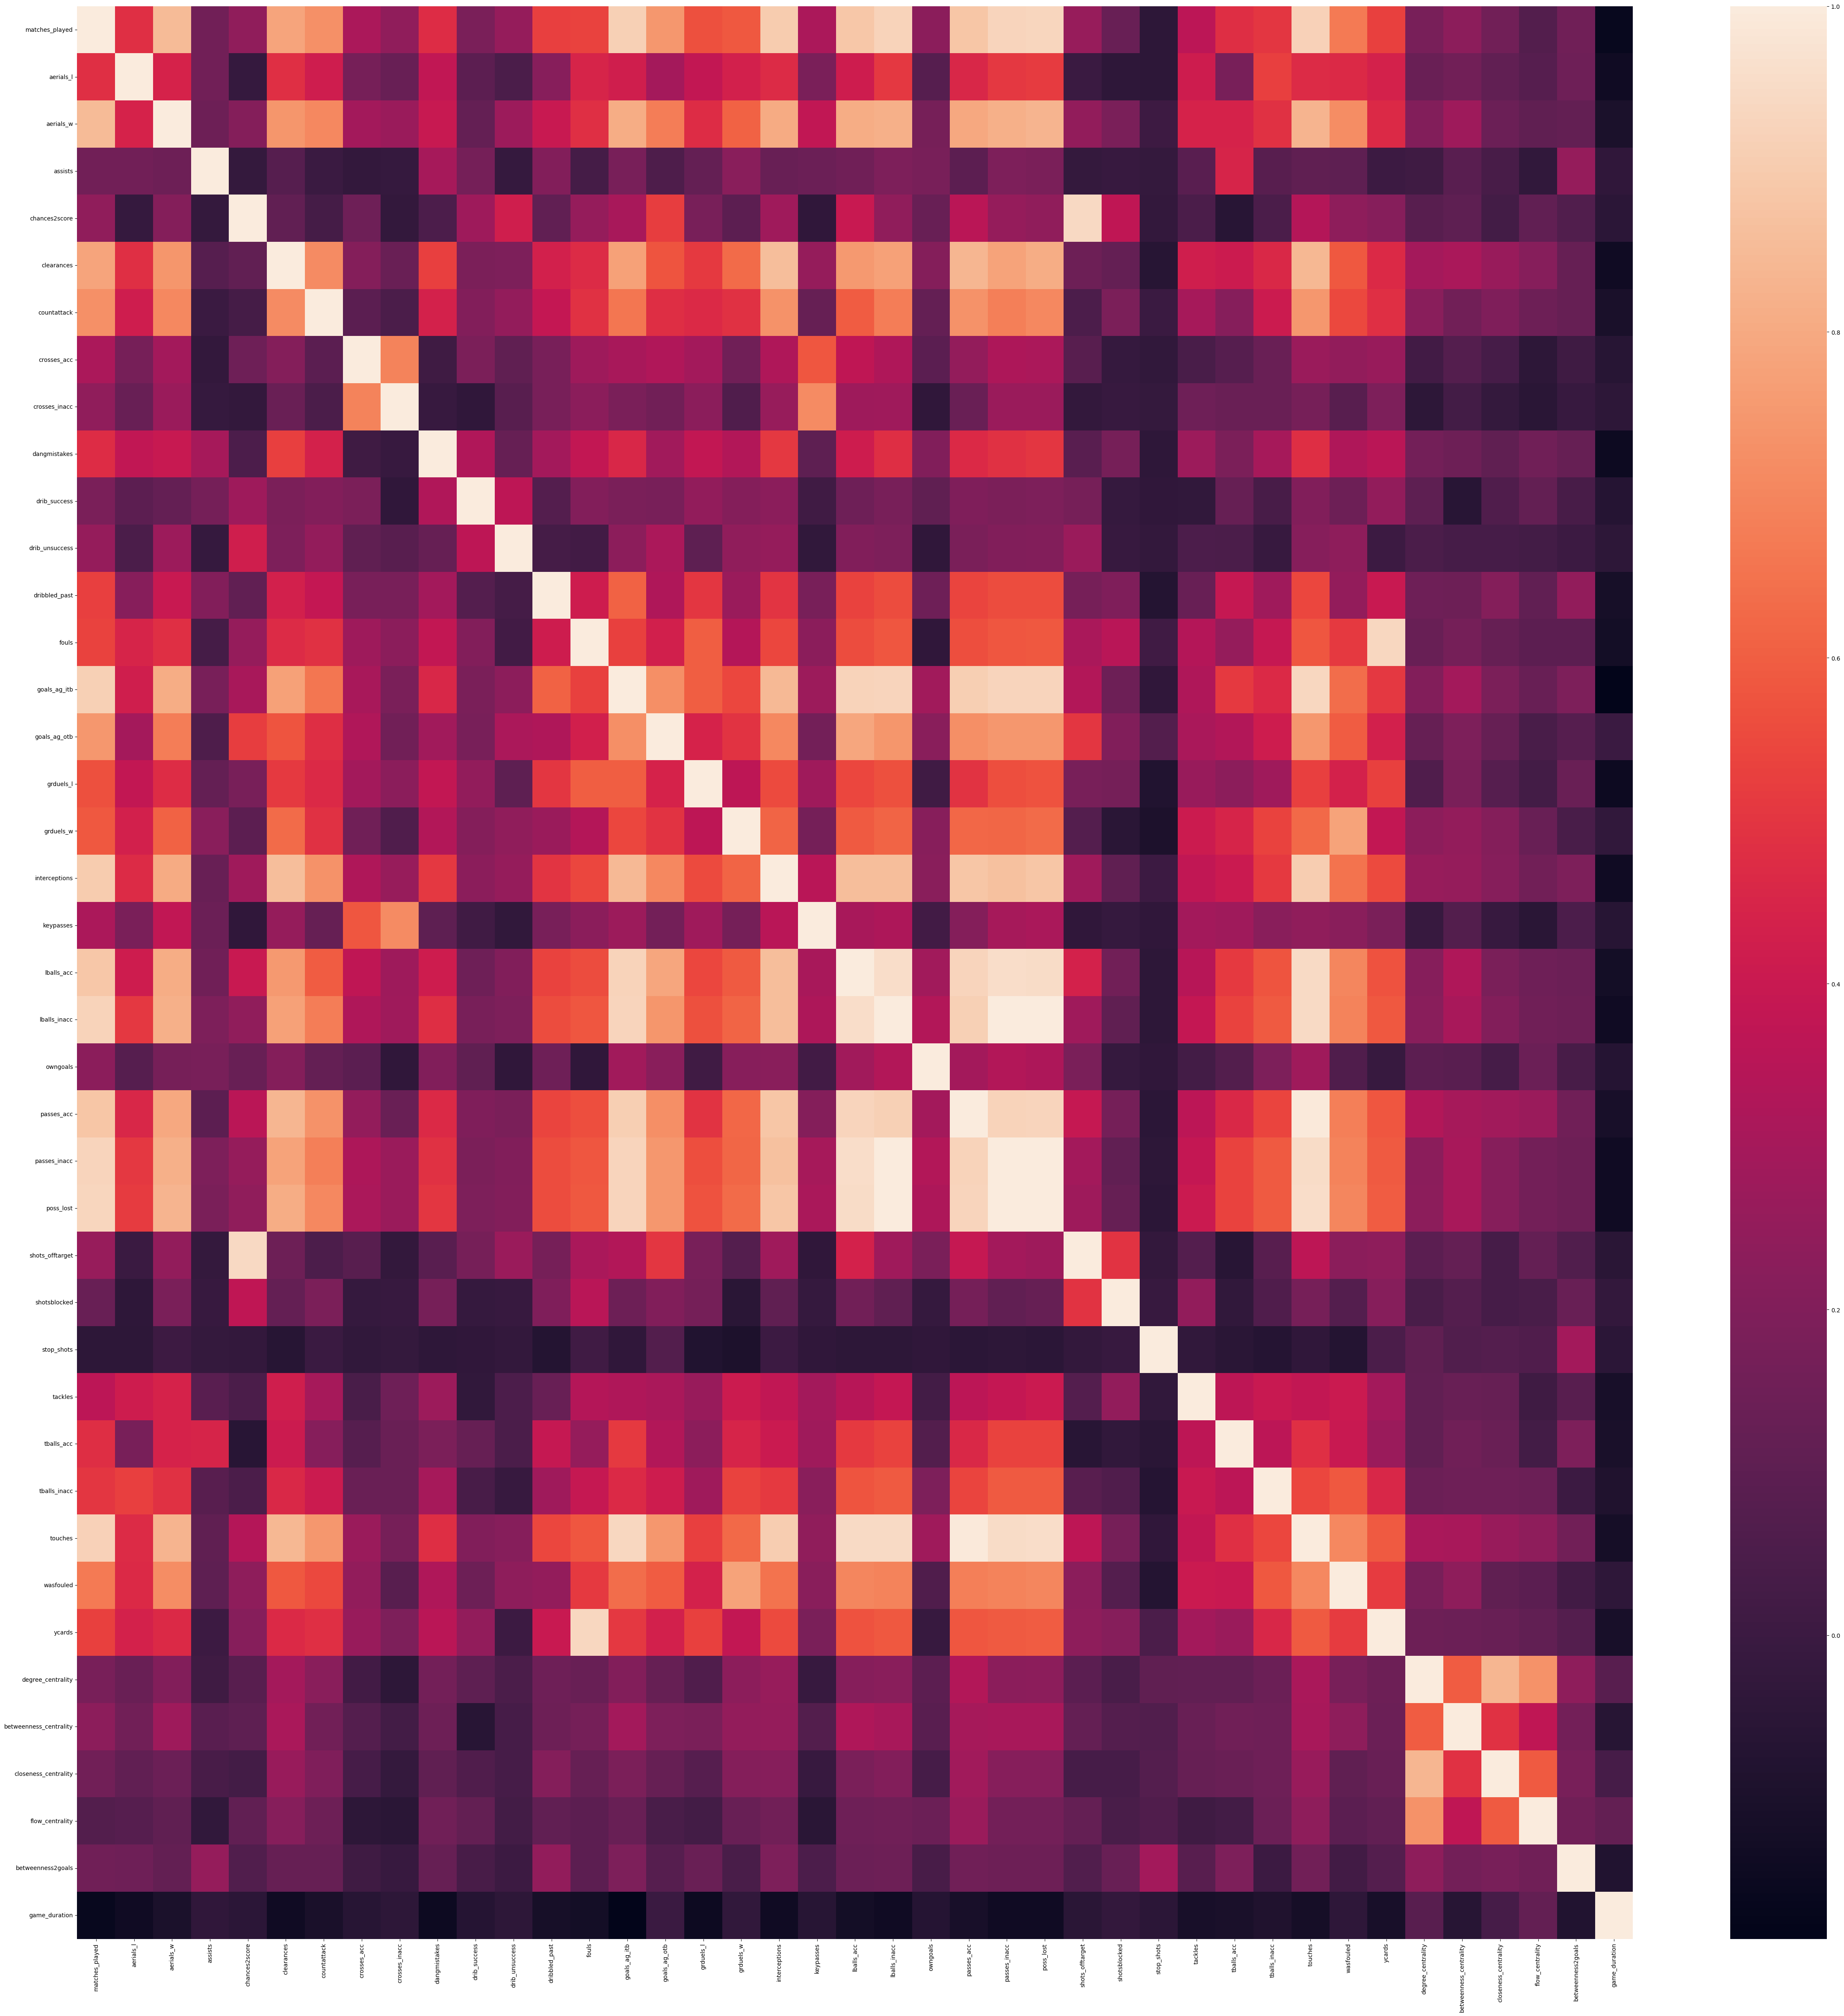

In [12]:
corr = data.drop(columns=['total_saves'], axis=1).corr()
top_features = corr.index
plt.figure(figsize=(60,60))
sns.heatmap(data[top_features].corr(), annot=False)

In [13]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [14]:
threshold = 0.8
correlation(data.drop(columns=['total_saves'], axis=1), threshold)

{'aerials_w',
 'closeness_centrality',
 'goals_ag_itb',
 'interceptions',
 'lballs_acc',
 'lballs_inacc',
 'passes_acc',
 'passes_inacc',
 'poss_lost',
 'shots_offtarget',
 'touches',
 'ycards'}

In [15]:
#check the columns to know which other they are correlated with
#check the columns to know which other they are correlated with
def correlated_columns(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    correlated_pairs = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname1 = corr_matrix.columns[i]
                colname2 = corr_matrix.columns[j]
                col_corr.add(colname1)
                col_corr.add(colname2)
                correlated_pairs.append((colname1, colname2, corr_matrix.iloc[i, j]))

    return col_corr, correlated_pairs

In [17]:
threshold = 0.8
col_corr, correlated_pairs = correlated_columns(data.drop(columns=['total_saves'], axis=1), threshold)

print("Highly correlated columns:")
print(col_corr)

print("\nPairs of highly correlated columns with their correlation coefficients:")
for pair in correlated_pairs:
    print(pair)

Highly correlated columns:
{'interceptions', 'shots_offtarget', 'passes_inacc', 'chances2score', 'clearances', 'closeness_centrality', 'touches', 'lballs_inacc', 'passes_acc', 'ycards', 'fouls', 'degree_centrality', 'matches_played', 'aerials_w', 'lballs_acc', 'poss_lost', 'goals_ag_itb'}

Pairs of highly correlated columns with their correlation coefficients:
('aerials_w', 'matches_played', 0.8483517987453226)
('goals_ag_itb', 'matches_played', 0.9122058170056597)
('goals_ag_itb', 'aerials_w', 0.8055256343732622)
('interceptions', 'matches_played', 0.9007838179243881)
('interceptions', 'aerials_w', 0.8041284101562101)
('interceptions', 'clearances', 0.8584049376903248)
('interceptions', 'goals_ag_itb', 0.8467812041678486)
('lballs_acc', 'matches_played', 0.887503178185634)
('lballs_acc', 'aerials_w', 0.8072022384395279)
('lballs_acc', 'goals_ag_itb', 0.9252824202024562)
('lballs_acc', 'interceptions', 0.8584923830374561)
('lballs_inacc', 'matches_played', 0.9239187204097212)
('lballs_

In [18]:
correlation = df['aerials_w'].corr(df['matches_played'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.848351798745323


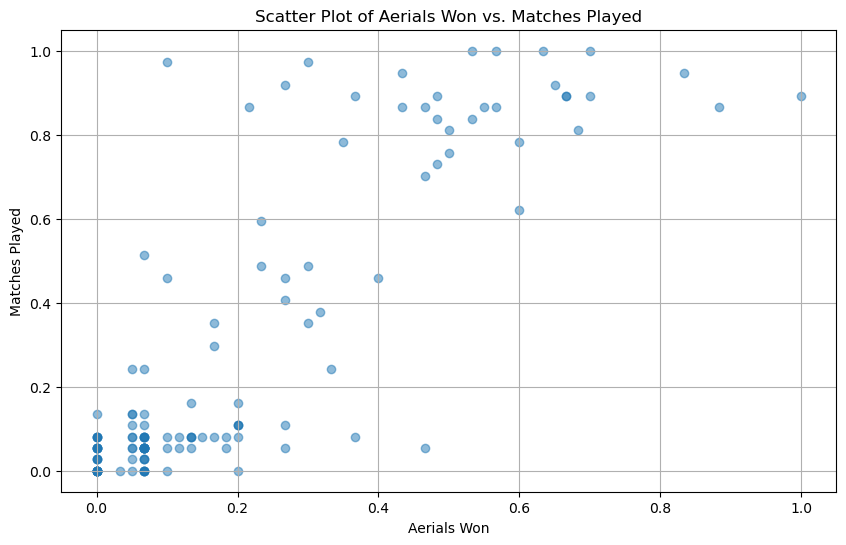

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df['aerials_w'], df['matches_played'], alpha=0.5)
plt.title('Scatter Plot of Aerials Won vs. Matches Played')
plt.xlabel('Aerials Won')
plt.ylabel('Matches Played')
plt.grid(True)
plt.show()


In [43]:
# Save X and y to CSV files
#change to goalkeeprs features later
#X.to_csv('defenders_featusres.csv', index=False)
#y.to_csv('defenders_target.csv', index=False)

#print("Files saved: 'defenders_features.csv' and 'defenders_target.csv'")

Files saved: 'defenders_features.csv' and 'defenders_target.csv'


In [ ]:
#for feature enginnering, we can do averages of players of different matches in the same season